全连接层（Fully Connected Layers）一般连接到卷积网络输出的特征图后边，特点是每一个节点都与上下层的所有节点相连，输入与输出都被延展成一维向量，因此从参数量来看全连接层的参数量是最多的，如图所示。

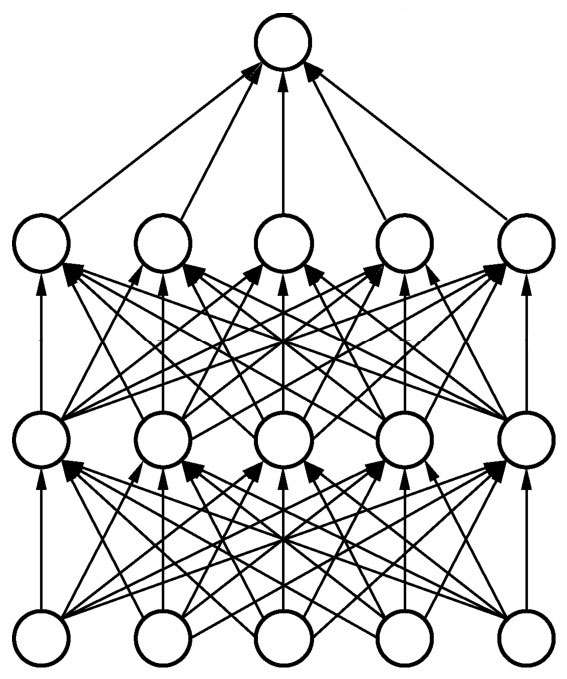

在物体检测算法中，卷积网络的主要作用是从局部到整体地提取图像的特征，而**全连接层则用来将卷积抽象出的特征图进一步映射到特定维度的标签空间，以求取损失或者输出预测结果。**

In [1]:
import torch
from torch import nn

#第一维表示一共有4个样本
input = torch.randn(4, 1024)
linear = nn.Linear(1024, 4096)
output = linear(input)
input.shape, output.shape

(torch.Size([4, 1024]), torch.Size([4, 4096]))

随着深度学习算法的发展，全连接层的缺点也逐渐暴露了出来，**最致命的问题在于其参数量的庞大**。大量的参数会导致网络模型应用部署困难，并且其中存在着大量的参数冗余，也容易发生过拟合的现象。

在很多场景中，我们可以使用**全局平均池化层（Global Average Pooling，GAP）**来取代全连接层，这种思想最早见于NIN（Network in Network）网络中。

总体上，使用GAP有如下3点好处：①利用池化实现了降维，极大地减少了网络的参数量。②将特征提取与分类合二为一，一定程度上可以防止过拟合。③由于去除了全连接层，可以实现任意图像尺度的输入。